**Charts**

In [1]:
import os; import sys; from pathlib import Path; from pprint import pformat ; from shutil import copytree
from tempfile import TemporaryDirectory ; import git ;  import matplotlib as mpl ; import matplotlib.pyplot as plt
import numpy as np ; import shapefile ; import flopy

In [2]:
sim_ws = Path('E:\\15_REPOS\\00_BETAMI\\bin\\Flopy_data\\freyberg')           ; sim_name = "freyberg"   
ex1    = 'E:\\15_REPOS\\00_BETAMI\\bin\\mf6.exe' ; ex2    = 'E:\\15_REPOS\\00_BETAMI\\bin\\mf2005.exe'
sim_ws2 = Path('E:\\15_REPOS\\00_BETAMI\\94_floPy\\02_plot')  ; sim_ws2.mkdir(exist_ok=True)   
sim_ws3 = Path('E:\\15_REPOS\\00_BETAMI\\bin\\Flopy_data\\freyberg\\gis')     ; exe_mp = "mp6"

In [3]:
#file_names = {"freyberg.bas","freyberg.dis","freyberg.githds", "freyberg.gitlist","freyberg.lpf","freyberg.nam","freyberg.oc",
#                  "freyberg.pcg","freyberg.rch","freyberg.riv","freyberg.wel"}

In [4]:
ml = flopy.modflow.Modflow.load("freyberg.nam", model_ws =sim_ws , exe_name=ex2)
ml.change_model_ws(sim_ws2) ; ml.write_input() ; success, buff = ml.run_model(silent=True, report=True)  ; assert success, pformat(buff)

In [5]:
files = ["freyberg.hds", "freyberg.cbc"]
for f in files:
    if os.path.isfile(os.path.join(sim_ws2, f)): 
        msg = f"Output file located: {f}" ; print(msg)

Output file located: freyberg.hds
Output file located: freyberg.cbc


In [6]:
mp    = flopy.modpath.Modpath6    ("freybergmp", exe_name=exe_mp, modflowmodel=ml, model_ws=sim_ws2)
mpbas = flopy.modpath.Modpath6Bas (mp,hnoflo=ml.bas6.hnoflo,hdry=ml.lpf.hdry,ibound=ml.bas6.ibound.array,prsity=0.2,prsityCB=0.2)
sim = mp.create_mpsim(trackdir="forward", simtype="endpoint", packages="RCH")
mp.write_input()
success, buff = mp.run_model(silent=True, report=True)
assert success, pformat(buff)

In [7]:
mpp   = flopy.modpath.Modpath6("freybergmpp", exe_name=exe_mp, modflowmodel=ml, model_ws=sim_ws2)
mpbas = flopy.modpath.Modpath6Bas(mpp,hnoflo=ml.bas6.hnoflo,hdry=ml.lpf.hdry,ibound=ml.bas6.ibound.array,prsity=0.2,prsityCB=0.2)
sim   = mpp.create_mpsim(trackdir="backward", simtype="pathline", packages="WEL")      ; mpp.write_input() ; mpp.run_model()

FloPy is using the following executable to run the model: C:\Users\gross.DESKTOP-AIRQM2M\anaconda3\Scripts\mp6.exe
Processing basic data ...
Checking head file ...
Checking budget file and building index ...
 
Run particle tracking simulation ...
Processing Time Step     1 Period     1.  Time =  1.00000E+01                                                                       
Particle tracking complete. Writing endpoint file ...                                                                               
End of MODPATH simulation. Normal termination.


(True, [])

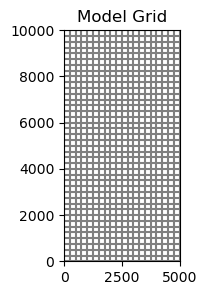

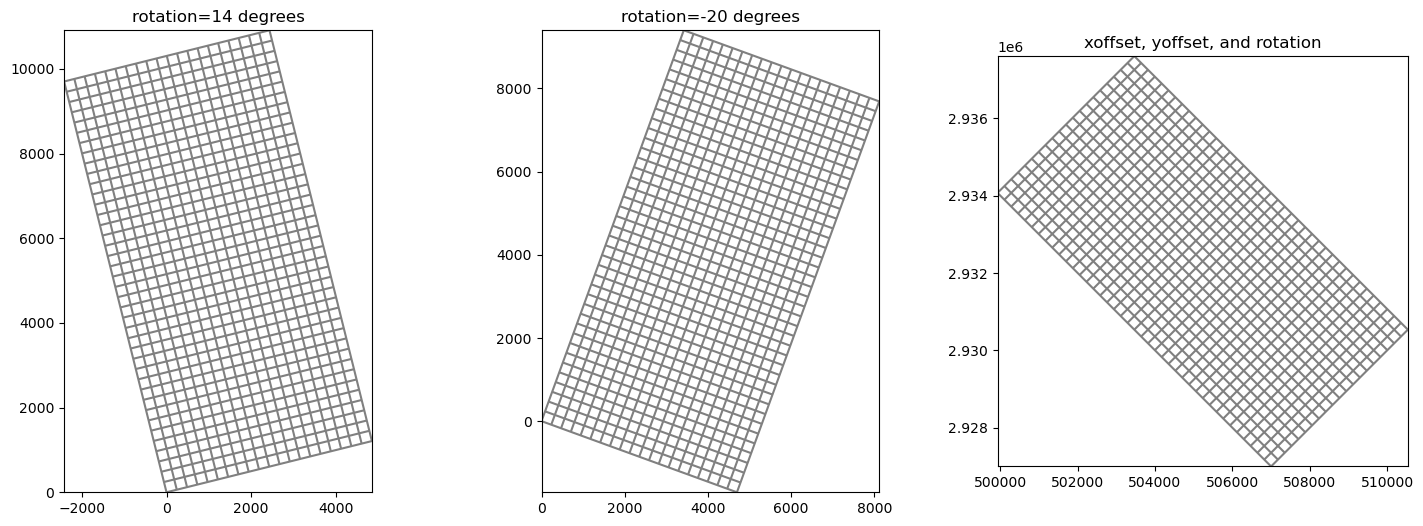

In [8]:
fig = plt.figure(figsize=(3,3))                                         ; ax = fig.add_subplot(1, 1, 1, aspect="equal")
mapview = flopy.plot.PlotMapView(model=ml) ; linecollection = mapview.plot_grid() ; t = ax.set_title("Model Grid")
fig = plt.figure(figsize=(18, 6))                             ; ax = fig.add_subplot(1, 3, 1, aspect="equal")  ; ml.modelgrid.set_coord_info(angrot=14)
mapview = flopy.plot.PlotMapView(model=ml) ; linecollection = mapview.plot_grid() ; t = ax.set_title("rotation=14 degrees")
ml.modelgrid.set_coord_info(angrot=-20)                               ; ax = fig.add_subplot(1, 3, 2, aspect="equal")
mapview = flopy.plot.PlotMapView(model=ml) ; linecollection = mapview.plot_grid() ; t = ax.set_title("rotation=-20 degrees")
ml.modelgrid.set_coord_info(xoff=507000, yoff=2927000, angrot=45)     ; ax = fig.add_subplot(1, 3, 3, aspect="equal")
mapview = flopy.plot.PlotMapView(model=ml) ; linecollection = mapview.plot_grid() ; t = ax.set_title("xoffset, yoffset, and rotation")

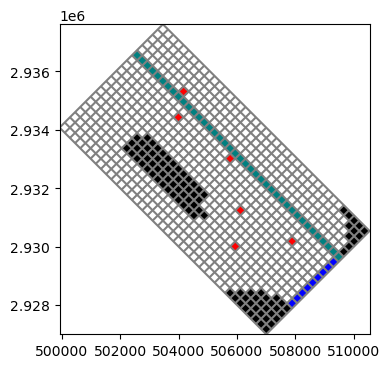

In [9]:
fig = plt.figure(figsize=(4, 5)) ; ax = fig.add_subplot(1, 1, 1, aspect="equal") ; mapview = flopy.plot.PlotMapView(model=ml)
quadmesh = mapview.plot_ibound() ; quadmesh = mapview.plot_bc("RIV")  ; quadmesh = mapview.plot_bc("WEL") ; linecollection = mapview.plot_grid()

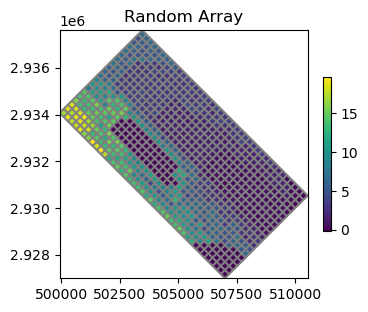

In [10]:
a = ml.dis.botm.array ; a2 = np.random.random((ml.dis.nrow, ml.dis.ncol))  ; fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, aspect="equal") ; ax.set_title("Random Array") ; mapview = flopy.plot.PlotMapView(model=ml, layer=0)
quadmesh = mapview.plot_array(a)             ; linecollection = mapview.plot_grid() ; cb = plt.colorbar(quadmesh, shrink=0.5)

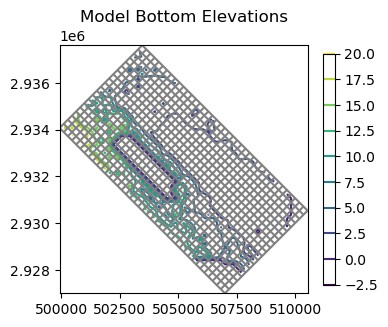

In [11]:
a = ml.dis.botm.array ;  fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, aspect="equal")  ; ax.set_title("Model Bottom Elevations") ; mapview = flopy.plot.PlotMapView(model=ml, layer=0)
contour_set = mapview.contour_array(a)          ; linecollection = mapview.plot_grid()  ; plt.colorbar(contour_set, shrink=0.75)

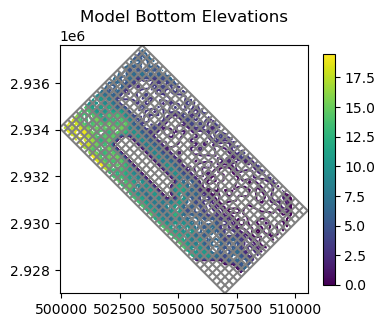

No CRS information for writing a .prj file.
Supply an valid coordinate system reference to the attached modelgrid object or .export() method.
Contours: 360


In [12]:
a = ml.dis.botm.array  ; levels = np.arange(0, 20, 0.5)  ; fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, aspect="equal") ; ax.set_title("Model Bottom Elevations")
mapview = flopy.plot.PlotMapView(model=ml, layer=0) ; contour_set = mapview.contour_array(a, levels=levels) ; linecollection = mapview.plot_grid()

norm = mpl.colors.Normalize(vmin=contour_set.cvalues.min(), vmax=contour_set.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap=contour_set.cmap)
sm.set_array([])
fig.colorbar(sm, shrink=0.75, ax=ax) ;  plt.show()

from flopy.export.utils import (export_contours)
shp_path = os.path.join(sim_ws2, "contours.shp")
export_contours(shp_path, contour_set)
from shapefile import Reader
with Reader(shp_path) as r:
    nshapes = len(r.shapes())
    print("Contours:", nshapes)

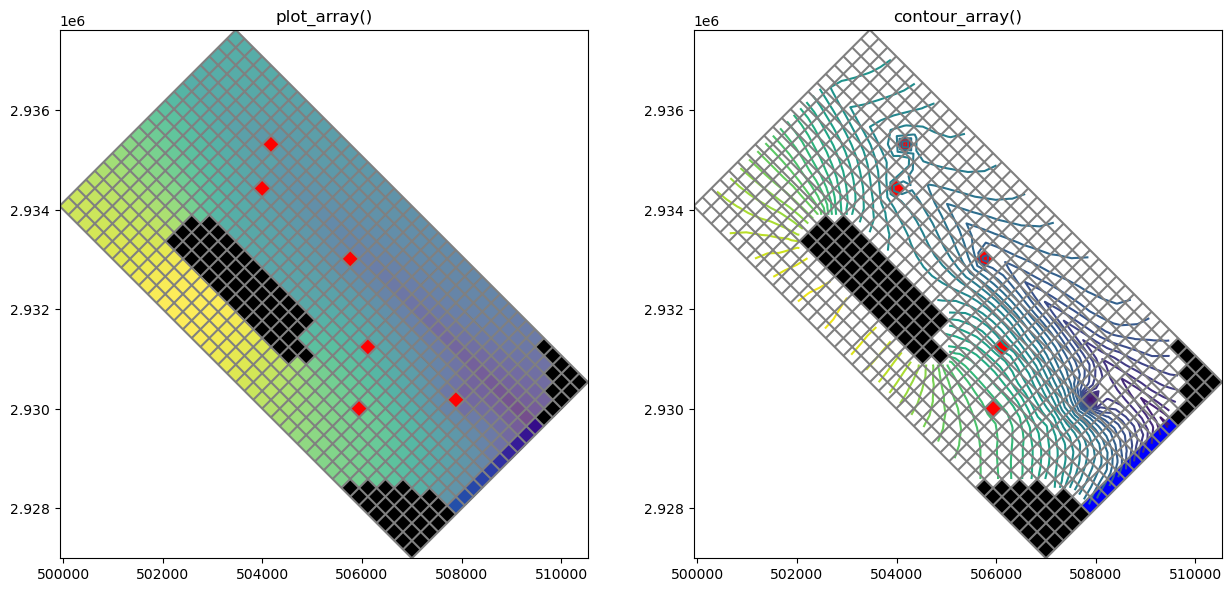

In [13]:
fname = os.path.join(sim_ws2, "freyberg.hds")  ; hdobj = flopy.utils.HeadFile(fname) ; head = hdobj.get_data()

levels = np.arange(10, 30, 0.5)  ; fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 2, 1, aspect="equal") ; ax.set_title("plot_array()")
mapview = flopy.plot.PlotMapView(model=ml) ; quadmesh = mapview.plot_ibound()  ; quadmesh = mapview.plot_array(head, alpha=0.5)
mapview.plot_bc("WEL") ; linecollection = mapview.plot_grid()

ax = fig.add_subplot(1, 2, 2, aspect="equal") ; ax.set_title("contour_array()")
mapview = flopy.plot.PlotMapView(model=ml) ; quadmesh = mapview.plot_ibound()  ; contour_set = mapview.contour_array(head, levels=levels)
mapview.plot_bc("WEL") ; linecollection = mapview.plot_grid()

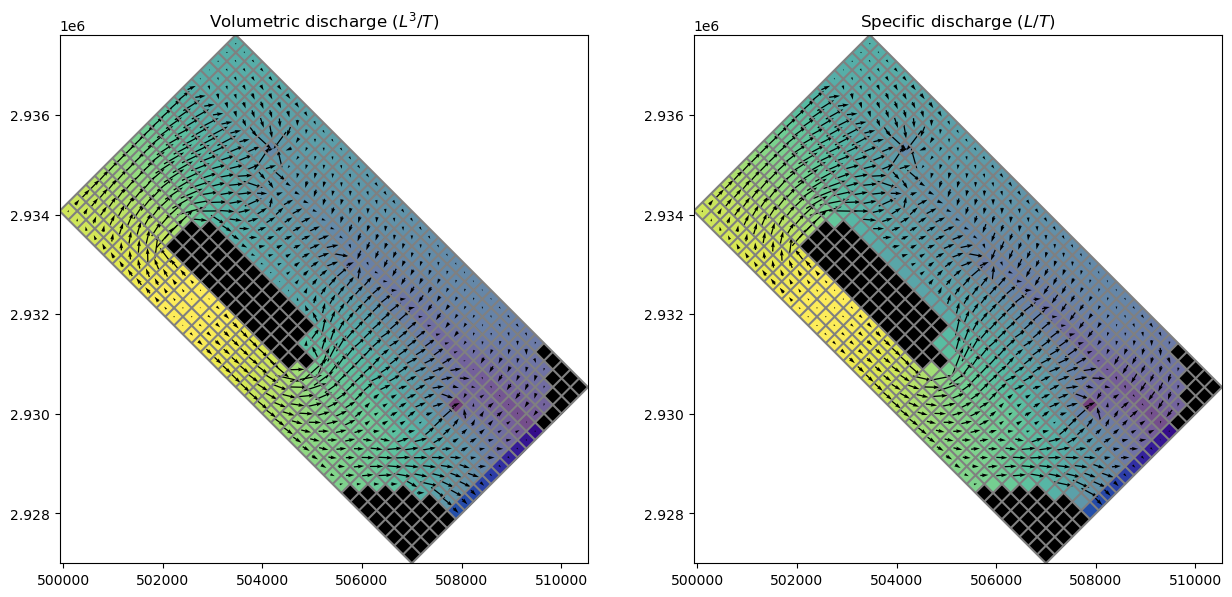

In [14]:
fname = os.path.join(sim_ws2, "freyberg.cbc")
cbb = flopy.utils.CellBudgetFile(fname)
head = hdobj.get_data()
frf = cbb.get_data(text="FLOW RIGHT FACE")[0]
fff = cbb.get_data(text="FLOW FRONT FACE")[0]
flf = None

qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge((frf, fff, None), ml)  # no head array for volumetric discharge
sqx, sqy, sqz = flopy.utils.postprocessing.get_specific_discharge((frf, fff, None), ml, head)
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(1, 2, 1, aspect="equal")
ax.set_title("Volumetric discharge (" + r"$L^3/T$" + ")")
mapview = flopy.plot.PlotMapView(model=ml)
quadmesh = mapview.plot_ibound()
quadmesh = mapview.plot_array(head, alpha=0.5)
quiver = mapview.plot_vector(qx, qy)
linecollection = mapview.plot_grid()

ax = fig.add_subplot(1, 2, 2, aspect="equal")
ax.set_title("Specific discharge (" + r"$L/T$" + ")")
mapview = flopy.plot.PlotMapView(model=ml)
quadmesh = mapview.plot_ibound()
quadmesh = mapview.plot_array(head, alpha=0.5)
quiver = mapview.plot_vector(sqx, sqy)  # include the head array for specific discharge
linecollection = mapview.plot_grid()

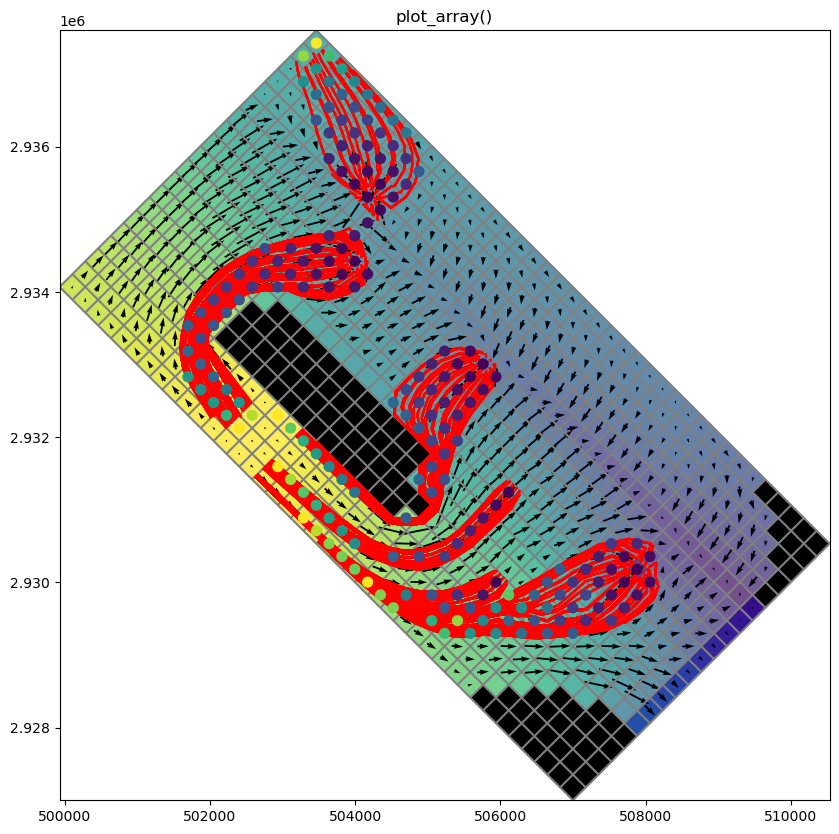

In [15]:
endfile = os.path.join(sim_ws2, mp.sim.endpoint_file) ; endobj = flopy.utils.EndpointFile(endfile) ; ept = endobj.get_alldata()
pthfile = os.path.join(sim_ws2, mpp.sim.pathline_file)  ; pthobj = flopy.utils.PathlineFile(pthfile)  ; plines = pthobj.get_alldata()

fig = plt.figure(figsize=(10, 10))  ; ax = fig.add_subplot(1, 1, 1, aspect="equal")  ; ax.set_title("plot_array()")
mapview = flopy.plot.PlotMapView(model=ml) ; quadmesh = mapview.plot_ibound() ; quadmesh = mapview.plot_array(head, alpha=0.5)
quiver = mapview.plot_vector(sqx, sqy) ; linecollection = mapview.plot_grid()
for d in ml.wel.stress_period_data[0]:
    mapview.plot_endpoint(ept,direction="starting",selection_direction="ending",selection=(d[0], d[1], d[2]),zorder=100)
travel_time_max = 200.0 * 365.25 * 24.0 * 60.0 * 60.0
ctt = f"<={travel_time_max}"

mapview.plot_pathline(plines, layer="all", colors="red", travel_time=ctt)

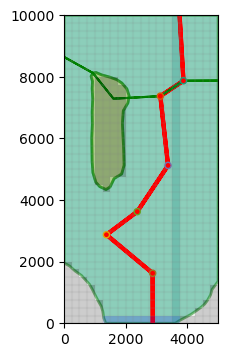

In [20]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, aspect="equal")

# reset the grid rotation and offsets to 0
ml.modelgrid.set_coord_info(xoff=0, yoff=0, angrot=0)

mapview = flopy.plot.PlotMapView(model=ml, ax=ax)

# Plot a shapefile of
shp = os.path.join(sim_ws3, "bedrock_outcrop_hole") ; patch_collection = mapview.plot_shapefile(shp,edgecolor="green",linewidths=2,alpha=0.5)
shp = os.path.join(sim_ws3, "cross_section")   ; patch_collection = mapview.plot_shapefile(shp, radius=0, lw=[3, 1.5], edgecolor=["red", "green"], facecolor="None")
shp = os.path.join(sim_ws3, "wells_locations") ; patch_collection = mapview.plot_shapefile(shp, radius=100, facecolor="red")

quadmesh = mapview.plot_ibound(alpha=0.1) ; quadmesh = mapview.plot_bc("RIV", alpha=0.1) ; linecollection = mapview.plot_grid(alpha=0.1)

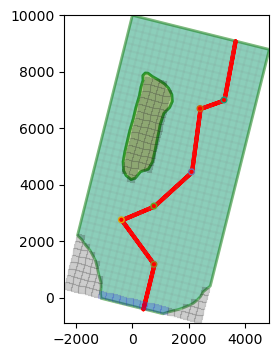

In [21]:
ml.modelgrid.set_coord_info(xoff=-2419.2189559966773, yoff=297.0427372400354, angrot=-14)
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
mapview = flopy.plot.PlotMapView(model=ml)

shp = os.path.join(sim_ws3, "bedrock_outcrop_hole_rotate14")
patch_collection = mapview.plot_shapefile(shp,edgecolor="green",linewidths=2,alpha=0.5 ) # # facecolor='none',
shp = os.path.join(sim_ws3,  "cross_section_rotate14")   ; patch_collection = mapview.plot_shapefile(shp, lw=3, edgecolor="red")
shp = os.path.join(sim_ws3,  "wells_locations_rotate14") ; patch_collection = mapview.plot_shapefile(shp, radius=100, facecolor="red")

quadmesh = mapview.plot_ibound(alpha=0.1)  ; linecollection = mapview.plot_grid(alpha=0.1)

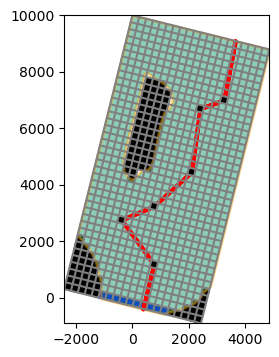

In [22]:
shp = os.path.join(sim_ws3, "bedrock_outcrop_hole_rotate14")
with shapefile.Reader(shp) as r:     polygon_w_hole = [r.shape(0)]

shp = os.path.join(sim_ws3,  "cross_section_rotate14")
with shapefile.Reader(shp) as r:     cross_section = r.shapes()

shp = os.path.join(sim_ws3,  "wells_locations_rotate14")
with shapefile.Reader(shp) as r:     wells = r.shapes()

ml.modelgrid.set_coord_info(xoff=-2419.2189559966773, yoff=297.0427372400354, angrot=-14)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
mapview = flopy.plot.PlotMapView(model=ml)

quadmesh = mapview.plot_ibound()
linecollection = mapview.plot_grid()

patch_collection0 = mapview.plot_shapes(polygon_w_hole, edgecolor="orange", linewidths=2, alpha=0.5)

# plot_line(s)
patch_collection1 = mapview.plot_shapes(cross_section, lw=3, edgecolor="red")

# plot_point(s)
patch_collection3 = mapview.plot_shapes(wells, radius=100, facecolor="k", edgecolor="k")

## **mf6-freyberg**

In [ ]:
sim_name = "mf6-freyberg"
sim_path = sim_ws2 / "mf6"


sim = flopy.mf6.MFSimulation.load(
    sim_name="mfsim.nam",
    version=vmf6,
    exe_name=exe_name_mf6,
    sim_ws=data_path / sim_name,
)
sim.set_sim_path(sim_path)
sim.write_simulation()
success, buff = sim.run_simulation()
if not success:
    print("Something bad happened.")
files = ["freyberg.hds", "freyberg.cbc"]
for f in files:
    if os.path.isfile(os.path.join(sim_ws2, f)):
        msg = f"Output file located: {f}"
        print(msg)
    else:
        errmsg = f"Error. Output file cannot be found: {f}"
        print(errmsg)

# + [markdown] pycharm={"name": "#%% md\n"}
# ### Plotting boundary conditions and arrays
#
# This works the same as modflow-2005, however the simulation object can host a number of modflow-6 models so we need to grab a model before attempting to plot with `PlotMapView`

# + pycharm={"name": "#%%\n"}
# get the modflow-6 model we want to plot
ml6 = sim.get_model("freyberg")
ml6.modelgrid.set_coord_info(angrot=-14)

fig = plt.figure(figsize=(15, 10))

# plot boundary conditions
ax = fig.add_subplot(1, 2, 1, aspect="equal")
mapview = flopy.plot.PlotMapView(model=ml6)
quadmesh = mapview.plot_ibound()
quadmesh = mapview.plot_bc("RIV")
quadmesh = mapview.plot_bc("WEL")
linecollection = mapview.plot_grid()
ax.set_title("Plot boundary conditions")

# plot model bottom elevations
a = ml6.dis.botm.array

ax = fig.add_subplot(1, 2, 2, aspect="equal")
ax.set_title("Model Bottom Elevations")
mapview = flopy.plot.PlotMapView(model=ml6, layer=0)
quadmesh = mapview.plot_array(a)
inactive = mapview.plot_inactive()
linecollection = mapview.plot_grid()
cb = plt.colorbar(quadmesh, shrink=0.5, ax=ax)

# + [markdown] pycharm={"name": "#%% md\n"}
# ### Contouring Arrays
#
# Contouring arrays follows the same code signature for MODFLOW-6 as the MODFLOW-2005 example. Just use the `contour_array()` method

# + pycharm={"name": "#%%\n"}
# The contour_array() method will take any keywords
# that can be used by the matplotlib.pyplot.contour
# function. So we can pass in levels, for example.
a = ml6.dis.botm.array
levels = np.arange(0, 20, 0.5)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_title("Model Bottom Elevations")
mapview = flopy.plot.PlotMapView(model=ml6, layer=0)
contour_set = mapview.contour_array(a, levels=levels)
linecollection = mapview.plot_grid()

# set up and plot a continuous colorbar in matplotlib for a contour plot
norm = mpl.colors.Normalize(
    vmin=contour_set.cvalues.min(), vmax=contour_set.cvalues.max()
)
sm = plt.cm.ScalarMappable(norm=norm, cmap=contour_set.cmap)
sm.set_array([])
fig.colorbar(sm, shrink=0.75, ax=ax)

# + [markdown] pycharm={"name": "#%% md\n"}
# ### Plotting specific discharge with a MODFLOW-6 model
#
# MODFLOW-6 includes a the PLOT_SPECIFIC_DISCHARGE flag in the NPF package to calculate and store discharge vectors for easy plotting. The postprocessing module will translate the specific dischage into vector array and `PlotMapView` has the `plot_vector()` method to use this data. The specific discharge array is stored in the cell budget file.

# + pycharm={"name": "#%%\n"}
# get the specific discharge from the cell budget file
cbc_file = os.path.join(sim_path, "freyberg.cbc")
cbc = flopy.utils.CellBudgetFile(cbc_file)
spdis = cbc.get_data(text="SPDIS")[0]

qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis, ml6)

# get the head from the head file
head_file = os.path.join(sim_path, "freyberg.hds")
head = flopy.utils.HeadFile(head_file)
hdata = head.get_alldata()[0]

# plot specific discharge using PlotMapView
fig = plt.figure(figsize=(4, 4))

mapview = flopy.plot.PlotMapView(model=ml6, layer=0)
linecollection = mapview.plot_grid()
quadmesh = mapview.plot_array(a=hdata, alpha=0.5)
quiver = mapview.plot_vector(qx, qy)
inactive = mapview.plot_inactive()

plt.title("Specific Discharge (" + r"$L/T$" + ")")
plt.colorbar(quadmesh, shrink=0.75)

# + [markdown] pycharm={"name": "#%% md\n"}
# ## Vertex model plotting with MODFLOW-6
#
# FloPy fully supports vertex discretization (DISV) plotting through the `PlotMapView` class. The method calls are identical to the ones presented previously for Structured discretization (DIS) and the same matplotlib keyword arguments are supported. Let's run through an example using a vertex model grid.

# + pycharm={"name": "#%%\n"}
# build and run vertex model grid demo problem


def run_vertex_grid_example(ws):
    """load and run vertex grid example"""
    if not os.path.exists(ws):
        os.mkdir(ws)

    from flopy.utils.gridgen import Gridgen

    Lx = 10000.0
    Ly = 10500.0
    nlay = 3
    nrow = 21
    ncol = 20
    delr = Lx / ncol
    delc = Ly / nrow
    top = 400
    botm = [220, 200, 0]

    ms = flopy.modflow.Modflow()
    dis5 = flopy.modflow.ModflowDis(
        ms,
        nlay=nlay,
        nrow=nrow,
        ncol=ncol,
        delr=delr,
        delc=delc,
        top=top,
        botm=botm,
    )

    model_name = "mp7p2"
    model_ws = os.path.join(ws, "mp7_ex2", "mf6")
    gridgen_ws = os.path.join(model_ws, "gridgen")
    g = Gridgen(ms.modelgrid, model_ws=gridgen_ws)

    rf0shp = os.path.join(gridgen_ws, "rf0")
    xmin = 7 * delr
    xmax = 12 * delr
    ymin = 8 * delc
    ymax = 13 * delc
    rfpoly = [[[(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax), (xmin, ymin)]]]
    g.add_refinement_features(rfpoly, "polygon", 1, range(nlay))

    rf1shp = os.path.join(gridgen_ws, "rf1")
    xmin = 8 * delr
    xmax = 11 * delr
    ymin = 9 * delc
    ymax = 12 * delc
    rfpoly = [[[(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax), (xmin, ymin)]]]
    g.add_refinement_features(rfpoly, "polygon", 2, range(nlay))

    rf2shp = os.path.join(gridgen_ws, "rf2")
    xmin = 9 * delr
    xmax = 10 * delr
    ymin = 10 * delc
    ymax = 11 * delc
    rfpoly = [[[(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax), (xmin, ymin)]]]
    g.add_refinement_features(rfpoly, "polygon", 3, range(nlay))

    g.build(verbose=False)

    gridprops = g.get_gridprops_disv()
    ncpl = gridprops["ncpl"]
    top = gridprops["top"]
    botm = gridprops["botm"]
    nvert = gridprops["nvert"]
    vertices = gridprops["vertices"]
    cell2d = gridprops["cell2d"]
    # cellxy = gridprops['cellxy']

    # create simulation
    sim = flopy.mf6.MFSimulation(
        sim_name=model_name, version="mf6", exe_name="mf6", sim_ws=model_ws
    )

    # create tdis package
    tdis_rc = [(1000.0, 1, 1.0)]
    tdis = flopy.mf6.ModflowTdis(
        sim, pname="tdis", time_units="DAYS", perioddata=tdis_rc
    )

    # create gwf model
    gwf = flopy.mf6.ModflowGwf(
        sim, modelname=model_name, model_nam_file=f"{model_name}.nam"
    )
    gwf.name_file.save_flows = True

    # create iterative model solution and register the gwf model with it
    ims = flopy.mf6.ModflowIms(
        sim,
        pname="ims",
        print_option="SUMMARY",
        complexity="SIMPLE",
        outer_hclose=1.0e-5,
        outer_maximum=100,
        under_relaxation="NONE",
        inner_maximum=100,
        inner_hclose=1.0e-6,
        rcloserecord=0.1,
        linear_acceleration="BICGSTAB",
        scaling_method="NONE",
        reordering_method="NONE",
        relaxation_factor=0.99,
    )
    sim.register_ims_package(ims, [gwf.name])

    # disv
    disv = flopy.mf6.ModflowGwfdisv(
        gwf,
        nlay=nlay,
        ncpl=ncpl,
        top=top,
        botm=botm,
        nvert=nvert,
        vertices=vertices,
        cell2d=cell2d,
    )

    # initial conditions
    ic = flopy.mf6.ModflowGwfic(gwf, pname="ic", strt=320.0)

    # node property flow
    npf = flopy.mf6.ModflowGwfnpf(
        gwf,
        xt3doptions=[("xt3d")],
        save_specific_discharge=True,
        icelltype=[1, 0, 0],
        k=[50.0, 0.01, 200.0],
        k33=[10.0, 0.01, 20.0],
    )

    # wel
    wellpoints = [(4750.0, 5250.0)]
    welcells = g.intersect(wellpoints, "point", 0)
    # welspd = flopy.mf6.ModflowGwfwel.stress_period_data.empty(gwf, maxbound=1, aux_vars=['iface'])
    welspd = [[(2, icpl), -150000, 0] for icpl in welcells["nodenumber"]]
    wel = flopy.mf6.ModflowGwfwel(
        gwf,
        print_input=True,
        auxiliary=[("iface",)],
        stress_period_data=welspd,
    )

    # rch
    aux = [np.ones(ncpl, dtype=int) * 6]
    rch = flopy.mf6.ModflowGwfrcha(
        gwf, recharge=0.005, auxiliary=[("iface",)], aux={0: [6]}
    )
    # riv
    riverline = [[(Lx - 1.0, Ly), (Lx - 1.0, 0.0)]]
    rivcells = g.intersect(riverline, "line", 0)
    rivspd = [[(0, icpl), 320.0, 100000.0, 318] for icpl in rivcells["nodenumber"]]
    riv = flopy.mf6.ModflowGwfriv(gwf, stress_period_data=rivspd)

    # output control
    oc = flopy.mf6.ModflowGwfoc(
        gwf,
        pname="oc",
        budget_filerecord=f"{model_name}.cbb",
        head_filerecord=f"{model_name}.hds",
        headprintrecord=[("COLUMNS", 10, "WIDTH", 15, "DIGITS", 6, "GENERAL")],
        saverecord=[("HEAD", "ALL"), ("BUDGET", "ALL")],
        printrecord=[("HEAD", "ALL"), ("BUDGET", "ALL")],
    )

    sim.write_simulation()
    success, buff = sim.run_simulation(silent=True, report=True)
    if success:
        for line in buff:
            print(line)
    else:
        raise ValueError("Failed to run.")

    mp_namea = f"{model_name}a_mp"
    mp_nameb = f"{model_name}b_mp"

    pcoord = np.array(
        [
            [0.000, 0.125, 0.500],
            [0.000, 0.375, 0.500],
            [0.000, 0.625, 0.500],
            [0.000, 0.875, 0.500],
            [1.000, 0.125, 0.500],
            [1.000, 0.375, 0.500],
            [1.000, 0.625, 0.500],
            [1.000, 0.875, 0.500],
            [0.125, 0.000, 0.500],
            [0.375, 0.000, 0.500],
            [0.625, 0.000, 0.500],
            [0.875, 0.000, 0.500],
            [0.125, 1.000, 0.500],
            [0.375, 1.000, 0.500],
            [0.625, 1.000, 0.500],
            [0.875, 1.000, 0.500],
        ]
    )
    nodew = gwf.disv.ncpl.array * 2 + welcells["nodenumber"][0]
    plocs = [nodew for i in range(pcoord.shape[0])]

    # create particle data
    pa = flopy.modpath.ParticleData(
        plocs,
        structured=False,
        localx=pcoord[:, 0],
        localy=pcoord[:, 1],
        localz=pcoord[:, 2],
        drape=0,
    )

    # create backward particle group
    fpth = f"{mp_namea}.sloc"
    pga = flopy.modpath.ParticleGroup(
        particlegroupname="BACKWARD1", particledata=pa, filename=fpth
    )

    facedata = flopy.modpath.FaceDataType(
        drape=0,
        verticaldivisions1=10,
        horizontaldivisions1=10,
        verticaldivisions2=10,
        horizontaldivisions2=10,
        verticaldivisions3=10,
        horizontaldivisions3=10,
        verticaldivisions4=10,
        horizontaldivisions4=10,
        rowdivisions5=0,
        columndivisions5=0,
        rowdivisions6=4,
        columndivisions6=4,
    )
    pb = flopy.modpath.NodeParticleData(subdivisiondata=facedata, nodes=nodew)
    # create forward particle group
    fpth = f"{mp_nameb}.sloc"
    pgb = flopy.modpath.ParticleGroupNodeTemplate(
        particlegroupname="BACKWARD2", particledata=pb, filename=fpth
    )

    # create modpath files
    mp = flopy.modpath.Modpath7(
        modelname=mp_namea, flowmodel=gwf, exe_name="mp7", model_ws=model_ws
    )
    flopy.modpath.Modpath7Bas(mp, porosity=0.1)
    flopy.modpath.Modpath7Sim(
        mp,
        simulationtype="combined",
        trackingdirection="backward",
        weaksinkoption="pass_through",
        weaksourceoption="pass_through",
        referencetime=0.0,
        stoptimeoption="extend",
        timepointdata=[500, 1000.0],
        particlegroups=pga,
    )

    # write modpath datasets
    mp.write_input()

    # run modpath
    success, buff = mp.run_model(silent=True, report=True)
    if success:
        for line in buff:
            print(line)
    else:
        raise ValueError("Failed to run.")

    # create modpath files
    mp = flopy.modpath.Modpath7(
        modelname=mp_nameb, flowmodel=gwf, exe_name="mp7", model_ws=model_ws
    )
    flopy.modpath.Modpath7Bas(mp, porosity=0.1)
    flopy.modpath.Modpath7Sim(
        mp,
        simulationtype="endpoint",
        trackingdirection="backward",
        weaksinkoption="pass_through",
        weaksourceoption="pass_through",
        referencetime=0.0,
        stoptimeoption="extend",
        particlegroups=pgb,
    )

    # write modpath datasets
    mp.write_input()

    # run modpath
    success, buff = mp.run_model(silent=True, report=True)
    assert success, pformat(buff)


run_vertex_grid_example(sim_ws2)

# check if model ran properly
mp7sim_ws2 = os.path.join(sim_ws2, "mp7_ex2", "mf6")
files = ["mp7p2.hds", "mp7p2.cbb"]
for f in files:
    if os.path.isfile(os.path.join(mp7sim_ws2, f)):
        msg = f"Output file located: {f}"
        print(msg)
    else:
        errmsg = f"Error. Output file cannot be found: {f}"
        print(errmsg)

# + pycharm={"name": "#%%\n"}
# load the simulation and get the model
vertex_sim_name = "mfsim.nam"
vertex_sim = flopy.mf6.MFSimulation.load(
    sim_name=vertex_sim_name,
    version=vmf6,
    exe_name=exe_name_mf6,
    sim_ws=mp7sim_ws2,
)
vertex_ml6 = vertex_sim.get_model("mp7p2")

# + [markdown] pycharm={"name": "#%% md\n"}
# ### Setting MODFLOW-6 Vertex Model Grid offsets, rotation and plotting
#
# Setting the `Grid` offsets and rotation is consistent in FloPy, no matter which type of discretization the user is using. The `set_coord_info()` method on the `modelgrid` is used.
#
# Plotting works consistently too, the user just calls the `PlotMapView` class and it accounts for the discretization type

# + pycharm={"name": "#%%\n"}
# set coordinate information on the modelgrid
vertex_ml6.modelgrid.set_coord_info(xoff=362100, yoff=4718900, angrot=-21)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_title("Vertex Model Grid (DISV)")

# use PlotMapView to plot a DISV (vertex) model
mapview = flopy.plot.PlotMapView(vertex_ml6, layer=0)
linecollection = mapview.plot_grid()

# + [markdown] pycharm={"name": "#%% md\n"}
# ### Plotting boundary conditions with Vertex Model grids
#
# The `plot_bc()` method can be used to plot boundary conditions.  It is setup to use the following dictionary to assign colors, however, these colors can be changed in the method call.
#
#     bc_color_dict = {'default': 'black', 'WEL': 'red', 'DRN': 'yellow',
#                      'RIV': 'green', 'GHB': 'cyan', 'CHD': 'navy'}
#
# Here we plot river (RIV) cell locations

# + pycharm={"name": "#%%\n"}
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_title("Vertex Model Grid (DISV)")

# use PlotMapView to plot a DISV (vertex) model
mapview = flopy.plot.PlotMapView(vertex_ml6, layer=0)
riv = mapview.plot_bc("RIV")
linecollection = mapview.plot_grid()

# + [markdown] pycharm={"name": "#%% md\n"}
# ### Plotting Arrays and Contouring with Vertex Model grids
#
# `PlotMapView` allows the user to plot arrays and contour with DISV based discretization. The `plot_array()` method is called in the same way as using a structured grid. The only difference is that `PlotMapView` builds a matplotlib patch collection for Vertex based grids.

# + pycharm={"name": "#%%\n"}
# get the head output for stress period 1 from the modflow6 head file
head = flopy.utils.HeadFile(os.path.join(mp7sim_ws2, "mp7p2.hds"))
hdata = head.get_alldata()[0, :, :, :]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_title("plot_array()")

mapview = flopy.plot.PlotMapView(model=vertex_ml6, layer=2)
patch_collection = mapview.plot_array(hdata, cmap="Dark2")
linecollection = mapview.plot_grid(lw=0.25, color="k")
cb = plt.colorbar(patch_collection, shrink=0.75)

# + [markdown] pycharm={"name": "#%% md\n"}
# The `contour_array()` method operates in the same way as the sturctured example.

# + pycharm={"name": "#%%\n"}
# plotting head array and then contouring the array!
levels = np.arange(327, 332, 0.5)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_title("Model head contours, layer 3")

mapview = flopy.plot.PlotMapView(model=vertex_ml6, layer=2)
pc = mapview.plot_array(hdata, cmap="Dark2")

# contouring the head array
contour_set = mapview.contour_array(hdata, levels=levels, colors="white")
plt.clabel(contour_set, fmt="%.1f", colors="white", fontsize=11)
linecollection = mapview.plot_grid(lw=0.25, color="k")

cb = plt.colorbar(pc, shrink=0.75, ax=ax)

# + [markdown] pycharm={"name": "#%% md\n"}
# ### Plotting MODPATH 7 results on a vertex model
#
# MODPATH-7 results can be plotted using the same built in methods as used previously to plot MODPATH-6 results. The `plot_pathline()` and `plot_timeseries()` methods are layered on the previous example to show modpath simulation results

# + pycharm={"name": "#%%\n"}
# load the MODPATH-7 results
mp_namea = "mp7p2a_mp"
fpth = os.path.join(mp7sim_ws2, f"{mp_namea}.mppth")
p = flopy.utils.PathlineFile(fpth)
p0 = p.get_alldata()

fpth = os.path.join(mp7sim_ws2, f"{mp_namea}.timeseries")
ts = flopy.utils.TimeseriesFile(fpth)
ts0 = ts.get_alldata()

# + pycharm={"name": "#%%\n"}
# setup the plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_title("MODPATH 7 particle tracking results")

mapview = flopy.plot.PlotMapView(vertex_ml6, layer=2)

# plot and contour head arrays
pc = mapview.plot_array(hdata, cmap="Dark2")
contour_set = mapview.contour_array(hdata, levels=levels, colors="white")
plt.clabel(contour_set, fmt="%.1f", colors="white", fontsize=11)
linecollection = mapview.plot_grid(lw=0.25, color="k")
cb = plt.colorbar(pc, shrink=0.75, ax=ax)

# plot the modpath results
pline = mapview.plot_pathline(p0, layer="all", color="blue", lw=0.75)
colors = ["green", "orange", "red"]
for k in range(3):
    tseries = mapview.plot_timeseries(ts0, layer=k, marker="o", lw=0, color=colors[k])

# + [markdown] pycharm={"name": "#%% md\n"}
# ### Plotting specific discharge vectors for DISV
# MODFLOW-6 includes a the PLOT_SPECIFIC_DISCHARGE flag in the NPF package to calculate and store discharge vectors for easy plotting. The postprocessing module will translate the specific dischage into vector array and `PlotMapView` has the `plot_vector()` method to use this data. The specific discharge array is stored in the cell budget file.

# + pycharm={"name": "#%%\n"}
cbb = flopy.utils.CellBudgetFile(
    os.path.join(mp7sim_ws2, "mp7p2.cbb"), precision="double"
)
spdis = cbb.get_data(text="SPDIS")[0]
qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis, vertex_ml6)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_title("Specific discharge for vertex model")

mapview = flopy.plot.PlotMapView(vertex_ml6, layer=2)
pc = mapview.plot_array(hdata, cmap="Dark2")
linecollection = mapview.plot_grid(lw=0.25, color="k")
cb = plt.colorbar(pc, shrink=0.75, ax=ax)

# plot specific discharge
quiver = mapview.plot_vector(qx, qy, normalize=True, alpha=0.60)

# + [markdown] pycharm={"name": "#%% md\n"}
# ## Unstructured grid (DISU) plotting with MODFLOW-USG and MODFLOW-6
#
# Unstructured grid (DISU) plotting has support through the `PlotMapView` class and the `UnstructuredGrid` discretization object. The method calls are identical to those used for vertex (DISV) and structured (DIS) model grids. Let's run through a few unstructured grid examples

# + pycharm={"name": "#%%\n"}
# set up the notebook for unstructured grid plotting
from flopy.discretization import UnstructuredGrid

datapth = sim_ws2 / "unstructured"
file_names = {
    "TriMesh_local.exp": "0be6a1a1743972ba98c9d9e63ac2e457813c0809bfbda120e09a97b04411a65e",
    "TriMesh_usg.exp": "0b450f2b306253a7b2889796e7a4eea52159f509c7b28a1f65929008dd854e08",
    "Trimesh_circle.exp": "1efb86bb77060dcec20e752e242076e3bd23046f5e47d20d948bcf4623b3deb7",
    "headu.githds": "cbe94655d471470d931923f70c7548b161ea4c5a22333b7fab6e2255450cda89",
    "ugrid_iverts.dat": "7e33ec7f7d1fdbeb6cb7bc8dbcdf35f262c82aaa38dc79b4fb3fe7b53f7c7c1b",
    "ugrid_verts.dat": "59493b26c8969789bb5a06d999db7a2dac324bffee280925e123007c81e689c7",
}
for fname, fhash in file_names.items():
    pooch.retrieve(
        url=f"https://github.com/modflowpy/flopy/raw/develop/examples/data/unstructured/{fname}",
        fname=fname,
        path=data_path / "unstructured",
        known_hash=fhash,
    )

copytree(data_path / "unstructured", datapth, dirs_exist_ok=True)


# simple functions to load vertices and incidence lists
def load_verts(fname):
    verts = np.genfromtxt(fname, dtype=[int, float, float], names=["iv", "x", "y"])
    verts["iv"] -= 1  # zero based
    return verts


def load_iverts(fname):
    f = open(fname)
    iverts = []
    xc = []
    yc = []
    for line in f:
        ll = line.strip().split()
        iverts.append([int(i) - 1 for i in ll[4:]])
        xc.append(float(ll[1]))
        yc.append(float(ll[2]))
    return iverts, np.array(xc), np.array(yc)


# + pycharm={"name": "#%%\n"}
# load vertices
fname = os.path.join(datapth, "ugrid_verts.dat")
verts = load_verts(fname)

# load the incidence list into iverts
fname = os.path.join(datapth, "ugrid_iverts.dat")
iverts, xc, yc = load_iverts(fname)

# + [markdown] pycharm={"name": "#%% md\n"}
# In this case, verts is just a 2-dimensional list of x,y vertex pairs.  iverts is also a 2-dimensional list, where the outer list is of size ncells, and the inner list is a list of the vertex numbers that comprise the cell.

# + pycharm={"name": "#%%\n"}
# Print the first 5 entries in verts and iverts
for ivert, v in enumerate(verts[:5]):
    print(f"Vertex coordinate pair for vertex {ivert}: {v}")
print("...\n")

for icell, vertlist in enumerate(iverts[:5]):
    print(f"List of vertices for cell {icell}: {vertlist}")

# + [markdown] pycharm={"name": "#%% md\n"}
# A flopy `UnstructuredGrid` object can now be created using the vertices and incidence list.  The `UnstructuredGrid` object is a key part of the plotting capabilities in flopy.  In addition to the vertex information, the `UnstructuredGrid` object also needs to know how many cells are in each layer.  This is specified in the ncpl variable, which is a list of cells per layer.

# + pycharm={"name": "#%%\n"}
ncpl = np.array(5 * [len(iverts)])
umg = UnstructuredGrid(verts, iverts, xc, yc, ncpl=ncpl, angrot=10)
print(ncpl)
print(umg)

# + [markdown] pycharm={"name": "#%% md\n"}
# Now that we have an `UnstructuredGrid`, we can use the flopy `PlotMapView` object to create different types of plots, just like we do for structured grids.

# + pycharm={"name": "#%%\n"}
f = plt.figure(figsize=(10, 10))
mapview = flopy.plot.PlotMapView(modelgrid=umg)
mapview.plot_grid()
plt.plot(umg.xcellcenters, umg.ycellcenters, "bo")

# + pycharm={"name": "#%%\n"}
# Create a random array for layer 0, and then plot it with a color flood and contours
f = plt.figure(figsize=(10, 10))

a = np.random.random(ncpl[0]) * 100
levels = np.arange(0, 100, 30)

mapview = flopy.plot.PlotMapView(modelgrid=umg)
pc = mapview.plot_array(a, cmap="viridis")
contour_set = mapview.contour_array(a, levels=levels, colors="white")
plt.clabel(contour_set, fmt="%.1f", colors="white", fontsize=11)
linecollection = mapview.plot_grid(color="k", lw=0.5)
colorbar = plt.colorbar(pc, shrink=0.75)

# + [markdown] pycharm={"name": "#%% md\n"}
# Here are some examples of some other types of grids.  The data files for these grids are located in the datapth folder.

# + pycharm={"name": "#%%\n"}
from pathlib import Path

fig = plt.figure(figsize=(10, 30))
fnames = [fname for fname in os.listdir(datapth) if fname.endswith(".exp")]
nplot = len(fnames)
for i, f in enumerate(fnames):
    ax = fig.add_subplot(nplot, 1, i + 1, aspect="equal")
    fname = os.path.join(datapth, f)
    umga = UnstructuredGrid.from_argus_export(fname, nlay=1)
    mapview = flopy.plot.PlotMapView(modelgrid=umga, ax=ax)
    linecollection = mapview.plot_grid(colors="sienna")
    ax.set_title(Path(fname).name)

# + [markdown] pycharm={"name": "#%% md\n"}
# ## Plotting using built in styles
#
# FloPy's plotting routines can be used with built in styles from the `styles` module. The `styles` module takes advantage of matplotlib's temporary styling routines by reading in pre-built style sheets. Two different types of styles have been built for flopy: `USGSMap()` and `USGSPlot()` styles which can be used to create report quality figures. The styles module also contains a number of methods that can be used for adding axis labels, text, annotations, headings, removing tick lines, and updating the current font.

# + pycharm={"name": "#%%\n"}
# import flopy's styles
from flopy.plot import styles

# + pycharm={"name": "#%%\n"}
# get the specific discharge from the cell budget file
cbc_file = os.path.join(sim_path, "freyberg.cbc")
cbc = flopy.utils.CellBudgetFile(cbc_file)
spdis = cbc.get_data(text="SPDIS")[0]

qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis, ml6)

# get the head from the head file
head_file = os.path.join(sim_path, "freyberg.hds")
head = flopy.utils.HeadFile(head_file)
hdata = head.get_alldata()[0]

# use USGSMap style to create a discharge figure:
with styles.USGSMap():
    fig = plt.figure(figsize=(12, 12))

    mapview = flopy.plot.PlotMapView(model=ml6, layer=0)
    linecollection = mapview.plot_grid()
    quadmesh = mapview.plot_array(a=hdata, alpha=0.5)
    quiver = mapview.plot_vector(qx, qy)
    inactive = mapview.plot_inactive()
    plt.colorbar(quadmesh, shrink=0.75)

    # use styles to add a heading, xlabel, ylabel
    styles.heading(letter="A.", heading="Specific Discharge (" + r"$L/T$" + ")")
    styles.xlabel(label="Easting")
    styles.ylabel(label="Northing")

# + [markdown] pycharm={"name": "#%% md\n"}
# Here is a second example showing how to change the font type using `styles`

# + pycharm={"name": "#%%\n"}
# use USGSMap style, change font type, and plot without tick lines:
with styles.USGSMap():
    fig = plt.figure(figsize=(12, 12))

    mapview = flopy.plot.PlotMapView(model=ml6, layer=0)
    linecollection = mapview.plot_grid()
    quadmesh = mapview.plot_array(a=hdata, alpha=0.5)
    quiver = mapview.plot_vector(qx, qy)
    inactive = mapview.plot_inactive()
    plt.colorbar(quadmesh, shrink=0.75)

    # change the font type to comic sans
    (styles.set_font_type(family="fantasy", fontname="Comic Sans MS"),)

    # use styles to add a heading, xlabel, ylabel, and remove tick marks
    styles.heading(
        letter="A.",
        heading="Comic Sans: Specific Discharge (" + r"$L/T$" + ")",
        fontsize=16,
    )
    styles.xlabel(label="Easting", fontsize=12)
    styles.ylabel(label="Northing", fontsize=12)
    styles.remove_edge_ticks()

# + [markdown] pycharm={"name": "#%% md\n"}
# ## Summary
#
# This notebook demonstrates some of the plotting functionality available with FloPy.  Although not described here, the plotting functionality tries to be general by passing keyword arguments passed to `PlotMapView` methods down into the `matplotlib.pyplot` routines that do the actual plotting.  For those looking to customize these plots, it may be necessary to search for the available keywords by understanding the types of objects that are created by the `PlotMapView` methods.  The `PlotMapView` methods return these `matplotlib.collections` objects so that they could be fine-tuned later in the script before plotting.
#
# Hope this gets you started!

# + pycharm={"name": "#%%\n"}
try:
    # ignore PermissionError on Windows
    tempdir.cleanup()
except:
    pass
# -
